In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [87]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
print(df_id.head())
print(df_usr.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.487777  2.386708  4.877037  7.561189   
1      hashing_cerrado_lineal  0.450315  2.087668  4.098327  6.100168   
2  hashing_cerrado_cuadratico  0.461188  2.190567  4.393337  6.541363   
3       hashing_cerrado_doble  0.506586  2.320794  4.514878  6.786246   
4                         stl  0.402534  1.981052  3.997110  6.296603   

          20  
0  10.336508  
1   8.167122  
2   8.923443  
3   9.266345  
4   8.272716  
                         mapa         1         5         10         15  \
0             hashing_abierto  0.658391  3.210793   6.553016   9.908591   
1      hashing_cerrado_lineal  0.796086  3.766546   7.519711  11.054650   
2  hashing_cerrado_cuadratico  0.831692  3.823022   7.780250  11.373682   
3       hashing_cerrado_doble  1.195831  5.563758  11.391768  16.501829   
4                         stl  0.416628  2.003561   4.196855   6.237125   

          20  
0  13

In [88]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')

df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

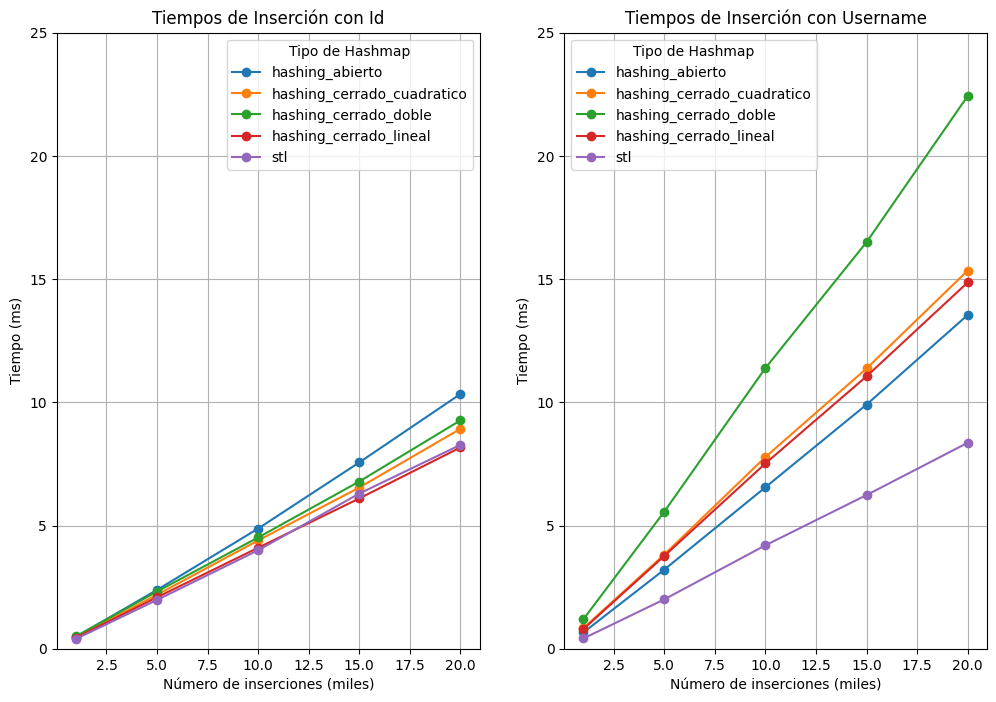

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones (miles)", ylim=(0,25))

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.show()


# Busquedas Tipo 1

In [90]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.454315  2.255753  4.717701  7.493498   
1      hashing_cerrado_lineal  0.267865  1.285167  2.417554  3.692775   
2  hashing_cerrado_cuadratico  0.398439  1.801998  3.752716  5.152102   
3       hashing_cerrado_doble  0.268755  1.390872  2.718050  4.141889   
4                         stl  0.176445  0.884504  1.825654  2.786293   

          20  
0  10.445949  
1   5.035606  
2   7.002734  
3   5.430582  
4   3.832549  
                         mapa         1         5        10        15  \
0             hashing_abierto  0.666413  3.252782  6.686972  9.978641   
1      hashing_cerrado_lineal  0.462336  2.232565  4.591417  6.749610   
2  hashing_cerrado_cuadratico  0.607602  2.717603  5.465766  8.003847   
3       hashing_cerrado_doble  0.660368  3.326408  6.485447  9.413233   
4                         stl  0.195717  1.031240  2.186633  3.127477   

          20  
0  13.608051  
1 

In [91]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')

df_id_melted['busquedas'] = df_id_melted['busquedas'].astype(int)
df_usr_melted['busquedas'] = df_usr_melted['busquedas'].astype(int)

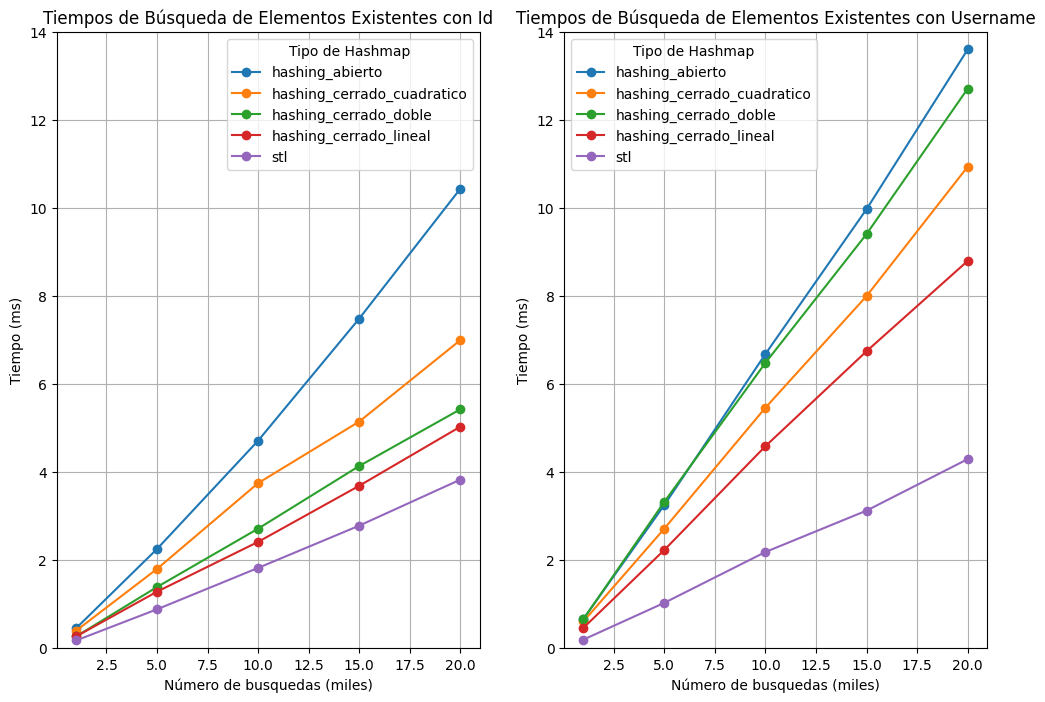

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de busquedas (miles)", ylim=(0, 14))

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.show()